In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    Args:
    image (numpy array): Original image.
    factor (int): Factor by which to downsample.
    Returns:
    numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height
    // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image

In [20]:
def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels in the image.
    Args:
    image (numpy array): Original image.
    levels (int): Number of grayscale levels.
    Returns:
    numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256
    // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

In [21]:
def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by
    side.
    Args:
    original (numpy array): Original image.
    sampled (numpy array): Sampled image.
    quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')
    plt.show()

In [22]:
image_path='Images/img_gray2.jpg'
sampling_factor=14
quantization_levels=9
# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")
# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)

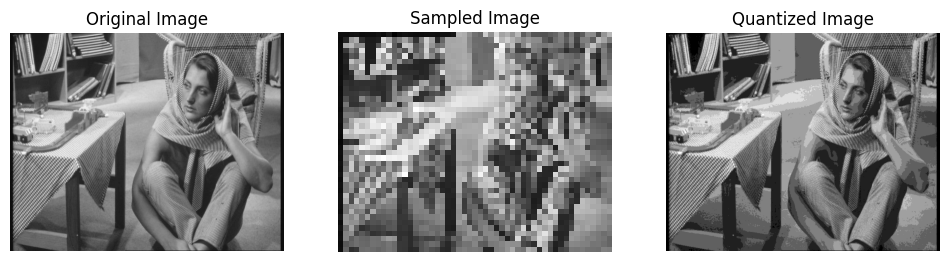

In [23]:
quantized_image = quantize_image(original_image,quantization_levels)
# Plot results
plot_images(original_image, sampled_image, quantized_image)

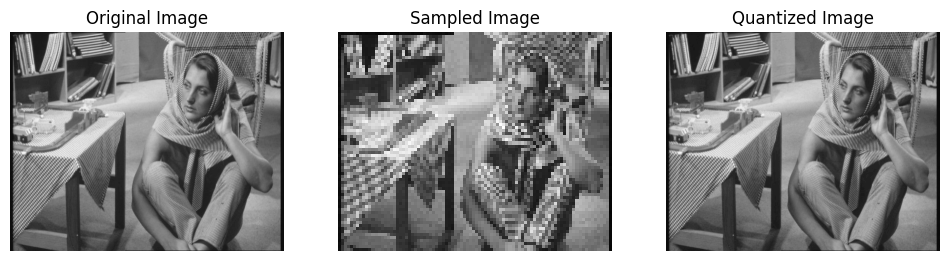

In [24]:
# Task 1
sampled_image = sample_image(original_image, 8)
quantized_image = quantize_image(original_image,50)

plot_images(original_image, sampled_image, quantized_image)


In [25]:
def plot_image(image, title='Image', figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [26]:
# Task 2:
from PIL import Image
import numpy as np

img1 = Image.open('Images/cat.jpg')
img2 = Image.open('Images/swain.gif')

resize = (400, 400)

img1 = img1.resize(resize, Image.Resampling.LANCZOS)
img2 = img2.resize(resize, Image.Resampling.LANCZOS)

im1arr = np.asarray(img1)
im2arr = np.asarray(img2)


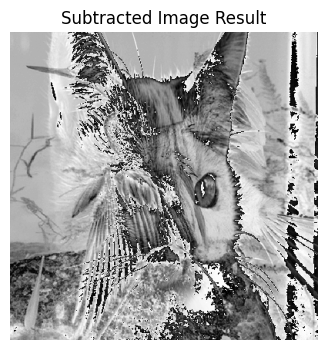

In [27]:
# Task 2.1:
subtraction = np.clip(im1arr - im2arr, 0, 255)
resultImage = Image.fromarray(subtraction.astype(np.uint8))
plot_image(resultImage, 'Subtracted Image Result')

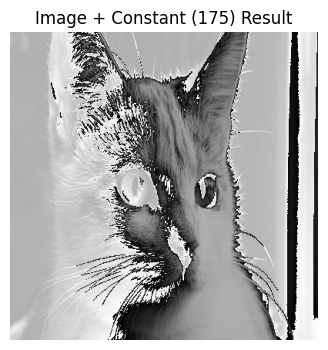

In [28]:
# Task 2.2: 
addition_constant = np.clip(im1arr + 175, 0, 255)
resultImage = Image.fromarray(addition_constant.astype(np.uint8))
plot_image(resultImage, 'Image + Constant (175) Result')

gray1 = img1.convert('L')
gray2 = img2.convert('L')

gray1arr = np.asarray(gray1)
gray2arr = np.asarray(gray2)

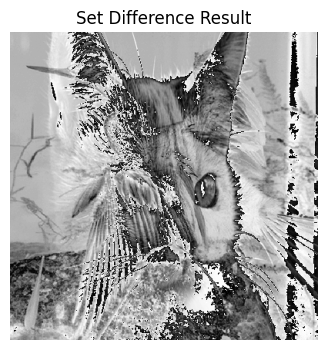

In [29]:

# Task 2.3: 
set_difference = np.clip(gray1arr - gray2arr, 0, 255)
resultImage = Image.fromarray(set_difference.astype(np.uint8))
plot_image(resultImage, 'Set Difference Result')

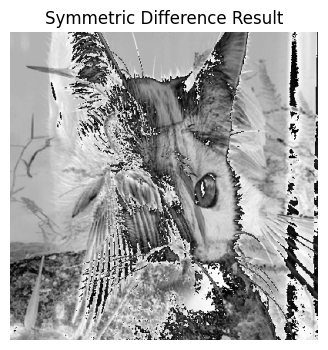

In [30]:

# Task 2.4: 
symmetric_difference = np.abs(gray1arr - gray2arr)
resultImage = Image.fromarray(symmetric_difference.astype(np.uint8))
plot_image(resultImage, 'Symmetric Difference Result')

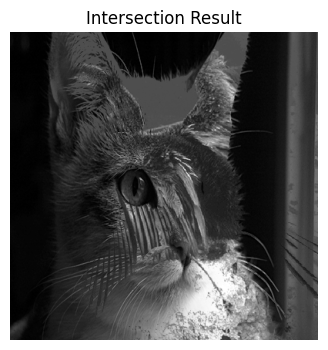

In [31]:
# Task 2.5: 

intersection = np.minimum(gray1arr, gray2arr)
resultImage = Image.fromarray(intersection.astype(np.uint8))
plot_image(resultImage, 'Intersection Result')